In [3]:
# setting the graphic width and height for ggplot
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

library(dplyr)

## as.Date()

In [1]:
# The date R 3.0.0 was released
x <- "2013-04-03"

# Examine structure of x
str(x)

# Use as.Date() to interpret x as a date
x_date <- as.Date(x)

# Examine structure of x_date
str(x_date)

# Store April 10 2014 as a Date
april_10_2014 <- as.Date("2014-04-10")

 chr "2013-04-03"
 Date[1:1], format: "2013-04-03"


## Automatic import

Sometimes you'll need to input a couple of dates by hand using as.Date() but it's much more common to have a column of dates in a data file.

Some functions that read in data will automatically recognize and parse dates in a variety of formats. In particular the import functions, like read_csv(), in the **readr** package will recognize dates in a few common formats.

There is also the anytime() function in the **anytime** package whose sole goal is to automatically parse strings as dates regardless of the format.

In [18]:
# Load the readr package
library(readr)

# Use read_csv() to import rversions.csv
releases <- read_csv("rversions.csv")

# Examine the structure of the date column
str(releases$date)

# Load the anytime package
library(anytime)

# Various ways of writing Sep 10 2009
sep_10_2009 <- c("September 10 2009", "2009-09-10", "10 Sep 2009", "09-10-2009")

# Use anytime() to parse sep_10_2009
anytime(sep_10_2009)

Parsed with column specification:
cols(
  major = col_integer(),
  minor = col_integer(),
  patch = col_integer(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


 Date[1:105], format: "1997-12-04" "1997-12-21" "1998-01-10" "1998-03-14" "1998-05-02" ...


[1] "2009-09-10 01:00:00 BST" "2009-09-10 01:00:00 BST"
[3] "2009-09-10 01:00:00 BST" "2009-09-10 01:00:00 BST"

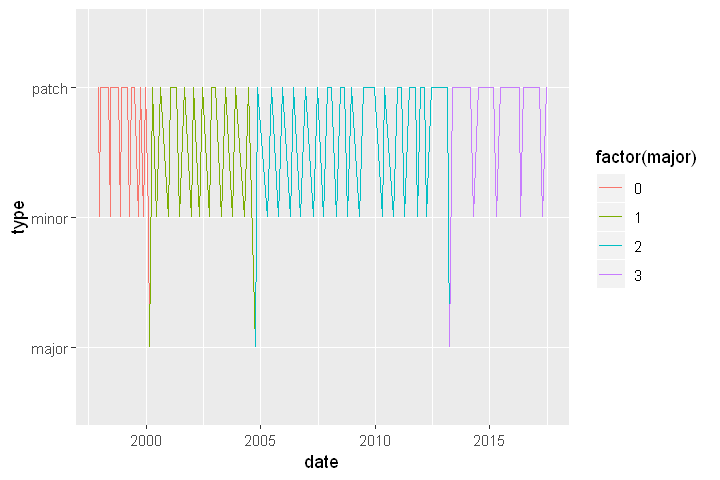

In [10]:
library(ggplot2)

# Set the x axis to the date column
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major)))

Warning message:
"Removed 87 rows containing missing values (geom_path)."

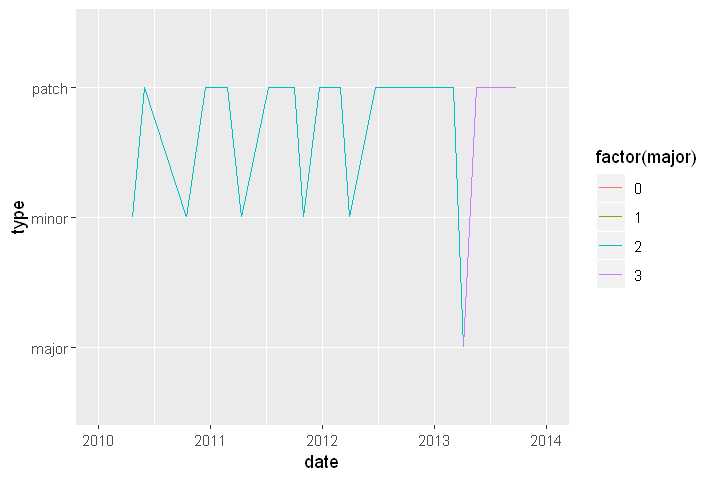

In [11]:
# Limit the axis to between 2010-01-01 and 2014-01-01
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  xlim(as.Date("2010-01-01"), as.Date("2014-01-01"))

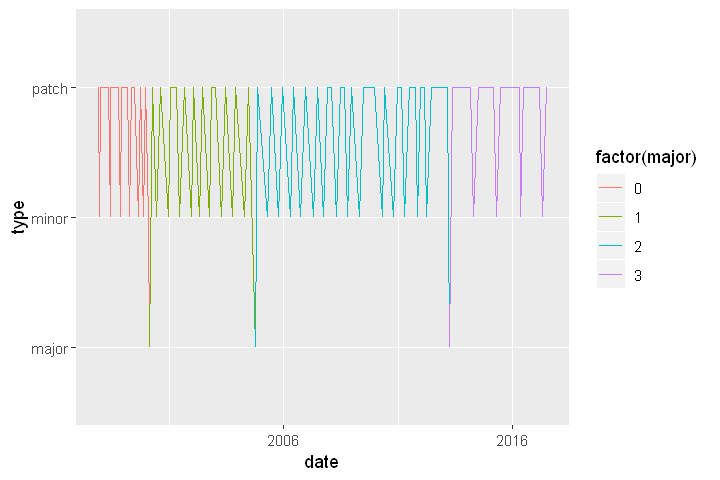

In [12]:
# Specify breaks every ten years and labels with "%Y"
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  scale_x_date(date_breaks = "10 years", date_labels = "%Y")


## Sys.Date()
gives you the current date

In [19]:
# Find the largest date
last_release_date <- max(releases$date)

# Filter row for last release
last_release <- filter(releases, date == last_release_date)

# Print last_release
last_release

# How long since last release?
Sys.Date() - last_release_date

major,minor,patch,date,datetime,time,type
3,4,1,2017-06-30,2017-06-30 07:04:11,07:04:11,patch


Time difference of 480 days

## Getting datetimes into R

Finding out in which timezone you live:

In [21]:
Sys.timezone()

[1] "Europe/London"

In [20]:
# Use as.POSIXct to enter the datetime 
as.POSIXct("2010-10-01 12:12:00")

# Use as.POSIXct again but set the timezone to `"America/Los_Angeles"`
as.POSIXct("2010-10-01 12:12:00", tz = "America/Los_Angeles")

# Use read_csv to import rversions.csv
releases <- read_csv("rversions.csv")

# Examine structure of datetime column
str(releases$datetime)

[1] "2010-10-01 12:12:00 BST"

[1] "2010-10-01 12:12:00 PDT"

Parsed with column specification:
cols(
  major = col_integer(),
  minor = col_integer(),
  patch = col_integer(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


 POSIXct[1:105], format: "1997-12-04 08:47:58" "1997-12-21 13:09:22" "1998-01-10 00:31:55" ...


In [30]:
# Import "cran-logs_2015-04-17.csv" with read_csv()
logs <- read_csv("cran-logs_2015-04-17.csv")

# Print logs
head(logs)

# Store the release time as a POSIXct object
release_time <-as.POSIXct("2015-04-16 07:13:33", tz = "UTC")

# When is the first download of 3.2.0?
head(logs %>% 
  filter(datetime > release_time,
    r_version == "3.2.0"),1)

Parsed with column specification:
cols(
  datetime = col_datetime(format = ""),
  r_version = col_character(),
  country = col_character()
)


datetime,r_version,country
2015-04-16 22:40:19,3.1.3,CO
2015-04-16 09:11:04,3.1.3,GB
2015-04-16 17:12:37,3.1.3,DE
2015-04-18 12:34:43,3.2.0,GB
2015-04-16 04:49:18,3.1.3,PE
2015-04-16 06:40:44,3.1.3,TW


datetime,r_version,country
2015-04-18 12:34:43,3.2.0,GB


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


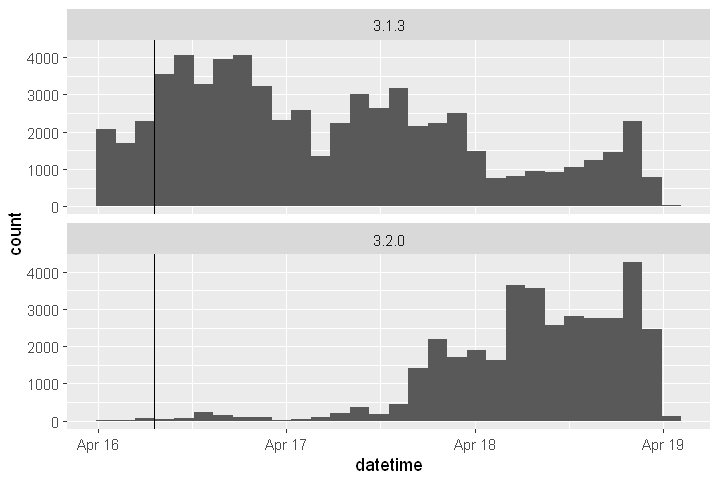

In [25]:
# Examine histograms of downloads by version
ggplot(logs, aes(x = datetime)) +
  geom_histogram() +
  geom_vline(aes(xintercept = as.numeric(release_time)))+
  facet_wrap(~ r_version, ncol = 1)

## lubridate

In [5]:
library(lubridate)

# Parse x 
x <- "2010 September 20th" # 2010-09-20
ymd(x)

# Parse y 
y <- "02.01.2010"  # 2010-01-02
dmy(y)

# Parse z 
z <- "Sep, 12th 2010 14:00"  # 2010-09-12T14:00
mdy_hm(z)

[1] "2010-09-20"

[1] "2010-01-02"

[1] "2010-09-12 14:00:00 UTC"

In [36]:
# Specify order to include both "mdy" and "dmy"
two_orders <- c("October 7, 2001", "October 13, 2002", "April 13, 2003", 
  "17 April 2005", "23 April 2017")
parse_date_time(two_orders, orders = c("mdy", "dmy"))

# Specify order to include "dOmY", "OmY" and "Y"
short_dates <- c("11 December 1282", "May 1372", "1253")
parse_date_time(short_dates, orders = c("dOmY", "OmY", "Y"))


[1] "2001-10-07 UTC" "2002-10-13 UTC" "2003-04-13 UTC" "2005-04-17 UTC"
[5] "2017-04-23 UTC"

[1] "1282-12-11 UTC" "1372-05-01 UTC" "1253-01-01 UTC"

In [38]:
library(lubridate)
library(readr)
library(dplyr)
library(ggplot2)

# Import CSV with read_csv()
akl_daily_raw <- read_csv("akl_weather_daily.csv")

# akl_daily_raw
glimpse(akl_daily_raw)

# Parse date 
akl_daily <- akl_daily_raw %>%
  mutate(date = ymd(date))

# akl_daily
glimpse(akl_daily)

Parsed with column specification:
cols(
  date = col_character(),
  max_temp = col_integer(),
  min_temp = col_integer(),
  mean_temp = col_integer(),
  mean_rh = col_integer(),
  events = col_character(),
  cloud_cover = col_integer()
)


Observations: 3,661
Variables: 7
$ date        <chr> "2007-9-1", "2007-9-2", "2007-9-3", "2007-9-4", "2007-9...
$ max_temp    <int> 60, 60, 57, 64, 53, 57, 59, 59, 55, 59, 57, 59, 62, 62,...
$ min_temp    <int> 51, 53, 51, 50, 48, 42, 41, 46, 50, 50, 50, 42, 44, 51,...
$ mean_temp   <int> 56, 56, 54, 57, 50, 50, 50, 52, 52, 54, 54, 50, 53, 56,...
$ mean_rh     <int> 75, 82, 78, 80, 90, 69, 77, 80, 88, 82, 78, 78, 77, 78,...
$ events      <chr> NA, "Rain", NA, "Rain", "Rain", NA, NA, NA, "Rain", "Ra...
$ cloud_cover <int> 4, 4, 6, 6, 7, 1, 4, 5, 7, 4, 3, 2, 4, 5, 4, 6, 4, 4, 4...
Observations: 3,661
Variables: 7
$ date        <date> 2007-09-01, 2007-09-02, 2007-09-03, 2007-09-04, 2007-0...
$ max_temp    <int> 60, 60, 57, 64, 53, 57, 59, 59, 55, 59, 57, 59, 62, 62,...
$ min_temp    <int> 51, 53, 51, 50, 48, 42, 41, 46, 50, 50, 50, 42, 44, 51,...
$ mean_temp   <int> 56, 56, 54, 57, 50, 50, 50, 52, 52, 54, 54, 50, 53, 56,...
$ mean_rh     <int> 75, 82, 78, 80, 90, 69, 77, 80, 88, 82, 78, 7

Warning message:
"Removed 1 rows containing missing values (geom_path)."

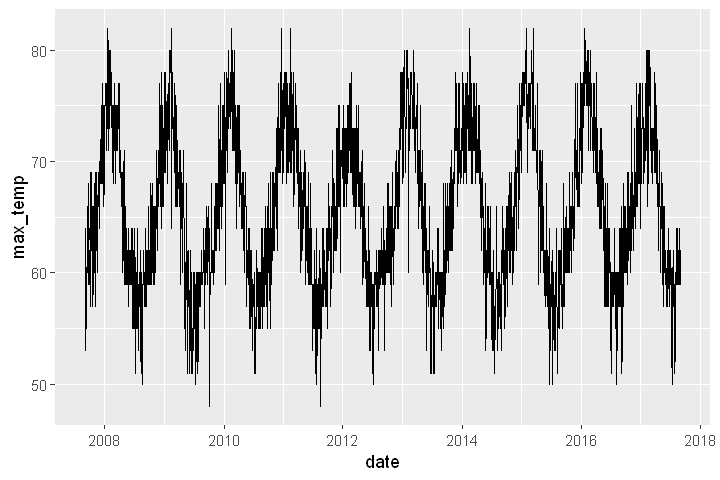

In [39]:
# Plot to check work
ggplot(akl_daily, aes(x = date, y = max_temp)) +
  geom_line() 

In [5]:
# Import "akl_weather_hourly_2016.csv"
akl_hourly_raw <- read_csv("akl_weather_hourly_2016.csv")

# Print akl_hourly_raw
head(akl_hourly_raw)

# Use make_date() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )

# Print date, time and datetime columns of akl_hourly
head(akl_hourly %>% select(date, time, datetime))


Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  mday = col_integer(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_integer(),
  date_utc = col_datetime(format = "")
)


year,month,mday,time,temperature,weather,conditions,events,humidity,date_utc
2016,1,1,00:00:00,68,Clear,Clear,NA,68,2015-12-31 11:00:00
2016,1,1,00:30:00,68,Clear,Clear,NA,68,2015-12-31 11:30:00
2016,1,1,01:00:00,68,Clear,Clear,NA,73,2015-12-31 12:00:00
2016,1,1,01:30:00,68,Clear,Clear,NA,68,2015-12-31 12:30:00
2016,1,1,02:00:00,68,Clear,Clear,NA,68,2015-12-31 13:00:00
2016,1,1,02:30:00,68,Clear,Clear,NA,68,2015-12-31 13:30:00


date,time,datetime
2016-01-01,00:00:00,2016-01-01 00:00:00
2016-01-01,00:30:00,2016-01-01 00:30:00
2016-01-01,01:00:00,2016-01-01 01:00:00
2016-01-01,01:30:00,2016-01-01 01:30:00
2016-01-01,02:00:00,2016-01-01 02:00:00
2016-01-01,02:30:00,2016-01-01 02:30:00


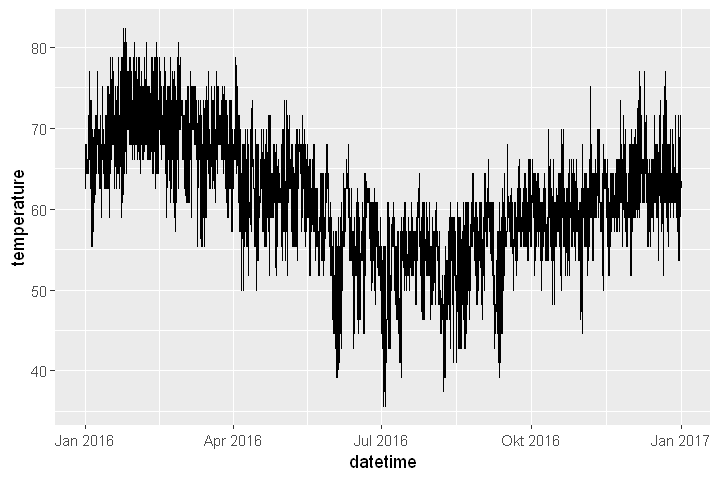

In [41]:
# Plot to check work
ggplot(akl_hourly, aes(x = datetime, y = temperature)) +
  geom_line()


In [45]:
library(ggplot2)

# Use wday() to tabulate release by day of the week
wday(releases$datetime) %>% table()

# Add label = TRUE to make table more readable
wday(releases$datetime, label = TRUE) %>% table()

# Create column wday to hold labelled week days
releases$wday <- wday(releases$datetime, label = TRUE)


.
 1  2  3  4  5  6  7 
 3 29  9 12 18 31  3 

.
So Mo Di Mi Do Fr Sa 
 3 29  9 12 18 31  3 

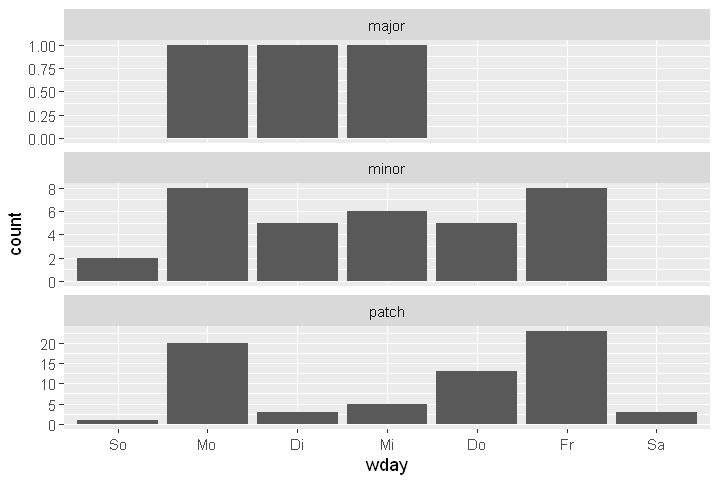

In [46]:
# Plot barchart of weekday by type of release
ggplot(releases, aes(x = wday)) +
  geom_bar() +
  facet_wrap(~ type, ncol = 1, scale = "free_y")

In [49]:
library(ggplot2)
library(dplyr)
library(ggridges)

# Add columns for year, yday and month
akl_daily <- akl_daily %>%
  mutate(
    year = year(date),
    yday = yday(date),
    month = month(date, label = TRUE))


Attaching package: 'ggridges'

The following object is masked from 'package:ggplot2':

    scale_discrete_manual



Warning message:
"Removed 1 rows containing missing values (geom_path)."

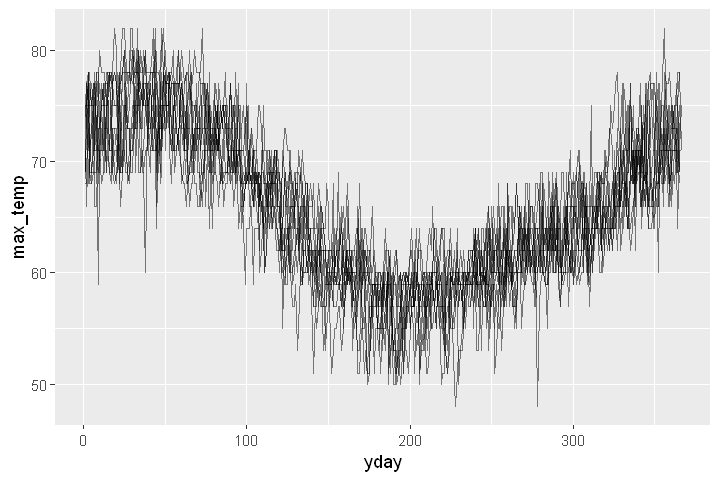

In [50]:
# Plot max_temp by yday for all years
ggplot(akl_daily, aes(x = yday, y = max_temp)) +
  geom_line(aes(group = year), alpha = 0.5)

Warning message:
"Removed 10 rows containing non-finite values (stat_density)."

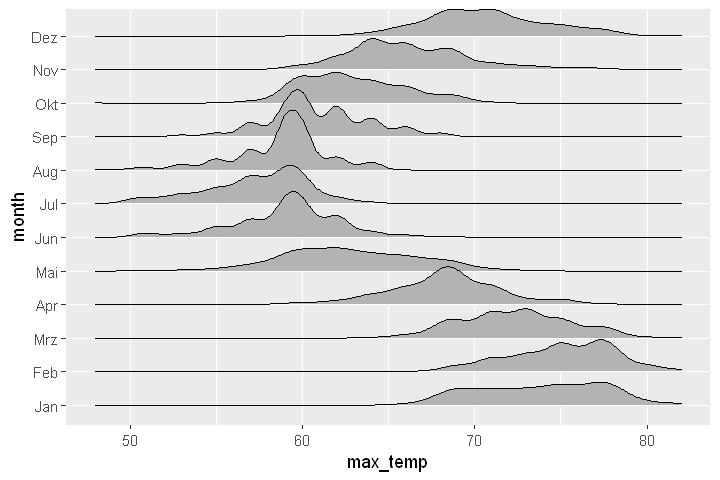

In [51]:
# Examine distribtion of max_temp by month
ggplot(akl_daily, aes(x = max_temp, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

In [53]:
# Create new columns hour, month and rainy
akl_hourly <- akl_hourly %>%
  mutate(
    hour = hour(datetime),
    month = month(datetime, label = TRUE),
    rainy = weather == "Precipitation"
  )

# Filter for hours between 8am and 10pm (inclusive)
akl_day <- akl_hourly %>% 
  filter(hour >= 8, hour <= 22)

# Summarise for each date if there is any rain
rainy_days <- akl_day %>% 
  group_by(month, date) %>%
  summarise(
    any_rain = any(rainy)
  )

# Summarise for each month, the number of days with rain
rainy_days %>% 
  summarise(
    days_rainy = sum(any_rain)
  )

month,days_rainy
Jan,15
Feb,13
Mrz,12
Apr,15
Mai,21
Jun,19
Jul,22
Aug,16
Sep,25
Okt,20


## Practice rounding

As you saw in the video, round_date() rounds a date to the nearest value, floor_date() rounds down, and ceiling_date() rounds up.

All three take a unit argument which specifies the resolution of rounding. You can specify "second", "minute", "hour", "day", "week", "month", "bimonth", "quarter", "halfyear", or "year". Or, you can specify any multiple of those units, e.g. "5 years", "3 minutes" etc.

In [54]:
r_3_4_1 <- ymd_hms("2016-05-03 07:13:28 UTC")

# Round down to day
floor_date(r_3_4_1, unit = "day")

# Round to nearest 5 minutes
round_date(r_3_4_1, unit = "5 minutes")

# Round up to week 
ceiling_date(r_3_4_1, unit = "week")

# Subtract r_3_4_1 rounded down to day
r_3_4_1 - floor_date(r_3_4_1, unit = "day")

[1] "2016-05-03 UTC"

[1] "2016-05-03 07:15:00 UTC"

[1] "2016-05-08 UTC"

Time difference of 7.224444 hours

In [56]:
# Create day_hour, datetime rounded down to hour
akl_hourly <- akl_hourly %>%
  mutate(
    day_hour = floor_date(datetime, unit = "hour")
  )

# Count observations per hour  
head(akl_hourly %>% 
  count(day_hour))

# Find day_hours with n != 2 
head(akl_hourly %>% 
  count(day_hour) %>%
  filter(n != 2) %>% 
  arrange(desc(n)))

day_hour,n
2016-01-01 00:00:00,2
2016-01-01 01:00:00,2
2016-01-01 02:00:00,2
2016-01-01 03:00:00,2
2016-01-01 04:00:00,2
2016-01-01 05:00:00,2


day_hour,n
2016-04-03 02:00:00,4
2016-09-25 00:00:00,4
2016-06-26 09:00:00,1
2016-09-01 23:00:00,1
2016-09-02 01:00:00,1
2016-09-04 11:00:00,1


## calculating with time
To get finer control over a difference between datetimes use the base function difftime(). For example instead of time1 - time2, you use difftime(time1, time2). 
`difftime()` takes an argument units which specifies the units for the difference. Your options are "secs", "mins", "hours", "days", or "weeks".

To practice you'll find the time since the first man stepped on the moon. You'll also see the lubridate functions today() and now() which when called with no arguments return the current date and time in your system's timezone.

In [6]:
# The date of landing and moment of step
date_landing <- mdy("July 20, 1969")
moment_step <- mdy_hms("July 20, 1969, 02:56:15", tz = "UTC")

# How many days since the first man on the moon?
difftime(today(), date_landing, units = "days")

# How many seconds since the first man on the moon?
difftime(now(), moment_step, units = "secs")

Time difference of 17994 days

Time difference of 1554746750 secs

Why would a day only have 82800 seconds? At 2am on Mar 12th 2017, Daylight Savings started in the Pacific timezone. That means a whole hour of seconds gets skipped between noon on the 11th and noon on the 12th. 


In [7]:
# Three dates
mar_11 <- ymd_hms("2017-03-11 12:00:00", 
  tz = "America/Los_Angeles")
mar_12 <- ymd_hms("2017-03-12 12:00:00", 
  tz = "America/Los_Angeles")
mar_13 <- ymd_hms("2017-03-13 12:00:00", 
  tz = "America/Los_Angeles")

# Difference between mar_13 and mar_12 in seconds
difftime(mar_13, mar_12, units = "secs")

# Difference between mar_12 and mar_11 in seconds
difftime(mar_12, mar_11, units = "secs")

Time difference of 86400 secs

Time difference of 82800 secs

## Adding or subtracting a time span to a datetime
If you want to account for the fact that time units, in this case days, have different lengths (i.e. due to daylight savings), you want a period days(). If you want the time 86400 seconds in the future you use a duration ddays().

In [8]:
# Add a period of one week to mon_2pm
mon_2pm <- dmy_hm("27 Aug 2018 14:00")
mon_2pm + weeks(1)

# Add a duration of 81 hours to tue_9am
tue_9am <- dmy_hm("28 Aug 2018 9:00")
tue_9am + dhours(81)

# Subtract a period of five years from today()
today() - years(5)

# Subtract a duration of five years from today()
today() - dyears(5)

[1] "2018-09-03 14:00:00 UTC"

[1] "2018-08-31 18:00:00 UTC"

[1] "2013-10-25"

[1] "2013-10-26"

Periods know about leap years, and since five years ago includes at least one leap year the period of five years is longer than the duration of 365*5 days. 

There was an eclipse over North America on 2017-08-21 at 18:26:40. It's possible to predict the next eclipse with similar geometry by calculating the time and date one Saros in the future. A Saros is a length of time that corresponds to 223 Synodic months, a Synodic month being the period of the Moon's phases, a duration of 29 days, 12 hours, 44 minutes and 3 seconds.

In [9]:
# Time of North American Eclipse 2017
eclipse_2017 <- ymd_hms("2017-08-21 18:26:40")

# Duration of 29 days, 12 hours, 44 mins and 3 secs
synodic <- ddays(29) + dhours(12) + dminutes(44) + dseconds(3)

# 223 synodic months
saros <- 223 * synodic

# Add saros to eclipse_2017
eclipse_2017 + saros

[1] "2035-09-02 02:09:49 UTC"

In [10]:
# Add a period of 8 hours to today
today_8am <- today() + hours(8) 

# Sequence of two weeks from 1 to 26
every_two_weeks <- 1:26 * weeks(2)

# Create datetime for every two weeks for a year
today_8am + every_two_weeks

 [1] "2018-11-08 08:00:00 UTC" "2018-11-22 08:00:00 UTC"
 [3] "2018-12-06 08:00:00 UTC" "2018-12-20 08:00:00 UTC"
 [5] "2019-01-03 08:00:00 UTC" "2019-01-17 08:00:00 UTC"
 [7] "2019-01-31 08:00:00 UTC" "2019-02-14 08:00:00 UTC"
 [9] "2019-02-28 08:00:00 UTC" "2019-03-14 08:00:00 UTC"
[11] "2019-03-28 08:00:00 UTC" "2019-04-11 08:00:00 UTC"
[13] "2019-04-25 08:00:00 UTC" "2019-05-09 08:00:00 UTC"
[15] "2019-05-23 08:00:00 UTC" "2019-06-06 08:00:00 UTC"
[17] "2019-06-20 08:00:00 UTC" "2019-07-04 08:00:00 UTC"
[19] "2019-07-18 08:00:00 UTC" "2019-08-01 08:00:00 UTC"
[21] "2019-08-15 08:00:00 UTC" "2019-08-29 08:00:00 UTC"
[23] "2019-09-12 08:00:00 UTC" "2019-09-26 08:00:00 UTC"
[25] "2019-10-10 08:00:00 UTC" "2019-10-24 08:00:00 UTC"

**The tricky thing about months**

What should ymd("2018-01-31") + months(1) return? Should it be 30, 31 or 28 days in the future? Try it. In general lubridate returns the same day of the month in the next month, but since the 31st of February doesn't exist lubridate returns a missing value, NA.

There are alternative addition and subtraction operators: %m+% and %m-% that have different behavior. Rather than returning an NA for a non-existent date, they roll back to the last existing date.

You'll explore their behavior by trying to generate a sequence for the last day in every month this year.

In [107]:
library(lubridate)
jan_31 <- ymd("2018-01-31")
# A sequence of 1 to 12 periods of 1 month
month_seq <- 1:12 * months(1)

# Add 1 to 12 months to jan_31
month_seq + jan_31

# Replace + with %m+%
month_seq %m+% jan_31

# Replace + with %m-%
jan_31 %m-% month_seq


[1] NA           "2018-03-31" NA           "2018-05-31" NA          
 [6] "2018-07-31" "2018-08-31" NA           "2018-10-31" NA          
[11] "2018-12-31" "2019-01-31"

[1] "2018-02-28" "2018-03-31" "2018-04-30" "2018-05-31" "2018-06-30"
 [6] "2018-07-31" "2018-08-31" "2018-09-30" "2018-10-31" "2018-11-30"
[11] "2018-12-31" "2019-01-31"

[1] "2017-12-31" "2017-11-30" "2017-10-31" "2017-09-30" "2017-08-31"
 [6] "2017-07-31" "2017-06-30" "2017-05-31" "2017-04-30" "2017-03-31"
[11] "2017-02-28" "2017-01-31"

# Intervals

In [87]:
names <- c("Elizabeth II", "Victoria", "George V", "George III", "George VI", "George IV", "Edward VII", "William IV", "Edward VIII", "George III(also United Kingdom)", "George II", "George I", "Anne", "Henry III", "Edward III", "Elizabeth I", "Henry VI", "Henry VI", "Æthelred II", "Æthelred II", "Henry VIII", "Charles II", "Henry I", "Henry II(co-ruler with Henry the Young King)", "Edward I", "Alfred the Great", "Edward the Elder", "Charles I", "Henry VII", "Edward the Confessor", "Richard II", "James I", "Edward IV", "Edward IV", "William I", "Edward II", "Cnut", "Stephen", "Stephen", "John", "Edgar I", "Æthelstan", "Henry IV", "William III(co-ruler with Mary II)", "Henry the Young King(co-ruler with Henry II)", "William II", "Richard I", "Eadred", "Henry V", "Edmund I", "Edward VI", "Mary II(co-ruler with William III)", "Mary I", "Anne(also Kingdom of Great Britain)", "Eadwig", "James II", "Edward the Martyr", "Harold I", "Harthacnut", "Richard III", "Louis (disputed)", "Harold II", "Edmund II", "Matilda (disputed)", "Edward V", "Edgar II", "Sweyn Forkbeard", "Jane (disputed)", "James VI", "William I", "Constantine II", "David II", "Alexander III", "Malcolm III", "Alexander II", "James I", "Malcolm II", "James V", "David I", "James III", "Charles II", "Charles II", "James IV", "Mary I", "Charles I", "Kenneth II", "James II", "Robert I", "Robert II", "Alexander I", "Macbeth", "Robert III", "Constantine I", "Kenneth MacAlpin", "William II", "Malcolm IV", "Giric(co-ruler with Eochaid?)", "Donald II", "Malcolm I", "Edgar", "Kenneth III", "Indulf", "Duncan I", "Mary II", "Amlaíb", "Anne(also Kingdom of Great Britain)", "Dub", "Cuilén", "Domnall mac Ailpín", "James VII", "Margaret", "John Balliol", "Donald III", "Constantine III", "Áed mac Cináeda", "Lulach", "Duncan II", "Ruaidrí Ua Conchobair", "Edward Bruce (disputed)", "Brian Ua Néill (disputed)", "Gruffudd ap Cynan", "Llywelyn the Great", "Owain Gwynedd", "Dafydd ab Owain Gwynedd", "Hywel ab Owain Gwynedd", "Llywelyn ap Gruffudd", "Owain Glyndŵr (disputed)", "Owain Goch ap Gruffydd", "Owain Lawgoch (disputed)", "Dafydd ap Llywelyn", "Dafydd ap Gruffydd")
from <- c("1952-02-06 UTC", "1837-06-20 UTC", "1910-05-06 UTC", "1801-01-01 UTC", "1936-12-11 UTC", "1820-01-29 UTC", "1901-01-22 UTC", "1830-06-26 UTC", "1936-01-20 UTC", "1760-10-25 UTC", "1727-06-22 UTC", "1714-08-01 UTC", "1707-05-01 UTC", NA, "1327-01-25 UTC", "1558-11-17 UTC", "1422-08-31 UTC", "1470-10-31 UTC", "978-03-18 UTC", "1014-02-03 UTC", "1509-04-22 UTC", "1649-01-30 UTC", "1100-08-03 UTC", "1154-10-25 UTC", "1272-11-20 UTC", "871-04-24 UTC", "899-10-27 UTC", "1625-03-27 UTC", "1485-08-22 UTC", "1042-06-08 UTC", "1377-06-22 UTC", "1603-03-24 UTC", "1461-03-04 UTC", "1471-04-11 UTC", "1066-12-12 UTC", "1307-07-07 UTC", "1016-11-30 UTC", "1135-12-22 UTC", "1141-11-01 UTC", "1199-04-06 UTC", "959-10-01 UTC", "924-08-02 UTC", "1399-09-29 UTC", "1689-02-13 UTC", "1170-06-14 UTC", "1087-09-09 UTC", "1189-07-06 UTC", "946-05-26 UTC", "1413-03-21 UTC", "939-10-27 UTC", "1547-01-28 UTC", "1689-02-13 UTC", "1553-07-19 UTC", "1702-03-08 UTC", "955-11-23 UTC", "1685-02-06 UTC", "975-07-09 UTC", "1037-11-12 UTC", "1040-03-17 UTC", "1483-06-26 UTC", "1216-06-14 UTC", "1066-01-05 UTC", "1016-04-23 UTC", "1141-04-07 UTC", "1483-04-09 UTC", "1066-10-15 UTC", "1013-12-25 UTC", "1553-07-10 UTC", "1567-07-24 UTC", "1165-12-09 UTC", "900-01-01 UTC", "1329-06-07 UTC", "1249-07-06 UTC", "1058-03-17 UTC", "1214-12-04 UTC", "1406-04-04 UTC", "1005-03-25 UTC", "1513-09-09 UTC", "1124-04-23 UTC", "1460-08-03 UTC", "1649-01-30 UTC", "1660-05-29 UTC", "1488-06-11 UTC", "1542-12-14 UTC", "1625-03-27 UTC", "971-01-01 UTC", "1437-02-21 UTC", "1306-03-25 UTC", "1371-02-22 UTC", "1107-01-08 UTC", "1040-08-14 UTC", "1390-04-19 UTC", "862-01-01 UTC", "843-01-01 UTC", "1689-05-11 UTC", "1153-05-24 UTC", "878-01-01 UTC", "889-01-01 UTC", "943-01-01 UTC", "1097-01-01 UTC", "997-01-01 UTC", "954-01-01 UTC", "1034-11-25 UTC", "1689-04-11 UTC", "971-01-01 UTC", "1702-03-08 UTC", "962-01-01 UTC", NA, "858-01-01 UTC", "1685-02-06 UTC", "1286-11-25 UTC", "1292-11-17 UTC", "1093-11-13 UTC", "1095-01-01 UTC", "877-01-01 UTC", "1057-08-15 UTC", "1094-05-01 UTC", "1166-01-01 UTC", "1315-06-01 UTC", "1258-01-01 UTC", "1081-01-01 UTC", "1195-01-01 UTC", "1137-01-01 UTC", "1170-01-01 UTC", "1170-01-01 UTC", "1253-01-01 UTC", "1400-09-16 UTC", "1246-02-25 UTC", "1372-05-01 UTC", "1240-04-12 UTC", "1282-12-11 UTC")
to <- c("2018-10-25 UTC", "1901-01-22 UTC", "1936-01-20 UTC", "1820-01-29 UTC", "1952-02-06 UTC", "1830-06-26 UTC", "1910-05-06 UTC", "1837-06-20 UTC", "1936-12-11 UTC", "1801-01-01 UTC", "1760-10-25 UTC", "1727-06-11 UTC", "1714-08-01 UTC", "1272-11-16 UTC", "1377-06-21 UTC", "1603-03-24 UTC", "1461-03-04 UTC", "1471-04-11 UTC", "1013-12-25 UTC", "1016-04-23 UTC", "1547-01-28 UTC", "1685-02-06 UTC", "1135-12-01 UTC", "1189-07-06 UTC", "1307-07-07 UTC", "899-10-26 UTC", "924-07-17 UTC", "1649-01-30 UTC", "1509-04-21 UTC", "1066-01-05 UTC", "1399-09-29 UTC", "1625-03-27 UTC", "1470-10-03 UTC", "1483-04-09 UTC", "1087-09-09 UTC", "1327-01-20 UTC", "1035-11-12 UTC", "1141-04-07 UTC", "1154-10-25 UTC", "1216-10-19 UTC", "975-07-08 UTC", "939-10-27 UTC", "1413-03-20 UTC", "1702-03-08 UTC", "1183-06-11 UTC", "1100-08-02 UTC", "1199-04-06 UTC", "955-11-23 UTC", "1422-08-31 UTC", "946-05-26 UTC", "1553-07-06 UTC", "1694-12-28 UTC", "1558-11-17 UTC", "1707-04-30 UTC", "959-10-01 UTC", "1688-12-11 UTC", "978-03-18 UTC", "1040-03-17 UTC", "1042-06-08 UTC", "1485-08-22 UTC", "1217-09-22 UTC", "1066-10-14 UTC", "1016-11-30 UTC", "1141-11-01 UTC", "1483-06-26 UTC", "1066-12-17 UTC", "1014-02-03 UTC", "1553-07-19 UTC", "1625-03-27 UTC", "1214-12-04 UTC", "943-01-01 UTC", "1371-02-22 UTC", "1286-03-19 UTC", "1093-11-13 UTC", "1249-07-06 UTC", "1437-02-21 UTC", "1034-11-25 UTC", "1542-12-14 UTC", "1153-05-24 UTC", "1488-06-11 UTC", "1651-09-03 UTC", "1685-02-06 UTC", "1513-09-09 UTC", "1567-07-24 UTC", "1649-01-30 UTC", "995-01-01 UTC", "1460-08-03 UTC", "1329-06-07 UTC", "1390-04-19 UTC", "1124-04-23 UTC", "1057-08-15 UTC", "1406-04-04 UTC", "877-01-01 UTC", "858-02-13 UTC", "1702-03-08 UTC", "1165-12-09 UTC", "889-01-01 UTC", "900-01-01 UTC", "954-01-01 UTC", "1107-01-08 UTC", "1005-03-25 UTC", "962-01-01 UTC", "1040-08-14 UTC", "1694-12-28 UTC", "977-01-01 UTC", "1707-04-30 UTC", NA, "971-01-01 UTC", "862-04-13 UTC", "1688-12-11 UTC", "1290-09-26 UTC", "1296-07-10 UTC", "1097-01-01 UTC", "1097-01-01 UTC", "878-01-01 UTC", "1058-03-17 UTC", "1094-11-12 UTC", "1193-01-01 UTC", "1318-10-14 UTC", "1260-01-01 UTC", "1137-01-01 UTC", "1240-04-11 UTC", "1170-01-01 UTC", "1195-01-01 UTC", "1170-01-01 UTC", "1282-12-11 UTC", "1416-01-01 UTC", "1255-01-01 UTC", "1378-07-01 UTC", "1246-02-25 UTC", "1283-10-03 UTC")
dominion <- c("United Kingdom", "United Kingdom", "United Kingdom", "United Kingdom","United Kingdom", "United Kingdom", "United Kingdom", "United Kingdom","United Kingdom", "Great Britain", "Great Britain", "Great Britain", "Great Britain", "England","England","England","England","England", "England", "England","England","England","England","England","England","England", "England", "England", "England","England","England", "England","England","England", "England","England", "England","England", "England","England", "England","England","England","England","England", "England","England","England", "England","England","England","England","England", "England", "England", "England", "England","England","England","England", "England","England","England","England","England","England","England","England","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland", "Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland", "Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Scotland","Ireland","Ireland","Ireland","Gwynedd","Gwynedd","Gwynedd","Gwynedd","Gwynedd","Wales","Wales","Wales","Wales","Wales","Wales")
monarchs <- data.frame(names, from, to, dominion, stringsAsFactors = FALSE)


In [88]:
monarchs$from <- as.Date(monarchs$from)
monarchs$to <- as.Date(monarchs$to)
str(monarchs)

'data.frame':	131 obs. of  4 variables:
 $ names   : chr  "Elizabeth II" "Victoria" "George V" "George III" ...
 $ from    : Date, format: "1952-02-06" "1837-06-20" ...
 $ to      : Date, format: "2018-10-25" "1901-01-22" ...
 $ dominion: chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


In [89]:
# Create an interval for reign
monarchs <- monarchs %>%
  mutate(reign = from %--% to) 

In [90]:
# Find the length of reign, and arrange
monarchs %>%
  mutate(length = int_length(reign)) %>% 
  arrange(desc(length)) %>%
  select(name, length, dominion)

ERROR: Error in arrange_impl(.data, dots): Column `reign` classes Period and Interval from lubridate are currently not supported.


In [102]:
designation <- c("1P/66 B1, 66", "1P/141 F1, 141", "1P/218 H1, 218","1P/295 J1, 295","1P/374 E1, 374","1P/451 L1, 451","1P/530 Q1, 530", "1P/607 H1, 607","1P/684 R1, 684","1P/760 K1, 760", "1P/837 F1, 837", "1P/912 J1, 912","1P/989 N1, 989","1P/1066 G1, 1066","1P/1145 G1, 1145", "1P/1222 R1, 1222", "1P/1301 R1, 1301", "1P/1378 S1, 1378","1P/1456 K1, 1456", "1P/1531 P1, 1531","1P/1607 S1, 1607",  "1P/1682 Q1, 1682","1P/1758 Y1, 1759 I", "1P/1835 P1, 1835 III", "1P/1909 R1, 1910 II, 1909c", "1P/1982 U1, 1986 III, 1982i",NA)
year <- c(66, 141, 218,295, 374, 451, 530,607, 684, 760,837,912, 989, 1066, 1145,1222, 1301, 1378, 1456, 1531, 1607, 1682, 1758, 1835, 1910, 1986, 2061)
perihelion_date <- c("66-01-26","141-03-25", "218-04-06", "295-04-07", "374-02-13","451-07-03", "530-11-15", "607-03-26", "684-11-26", "760-06-10", "837-02-25", "912-07-27", "989-09-02", "1066-03-25", "1145-04-19","1222-09-10", "1301-10-22", "1378-11-09", "1456-01-08", "1531-08-26","1607-10-27", "1682-09-15", "1758-03-13", "1835-11-16", "1910-04-20","1986-02-09", "2061-07-28")
start_date <- c("66-01-25", "141-03-22", "218-04-06", "295-04-07", "374-02-13","451-06-28", "530-09-27", "607-03-15", "684-10-02", "760-05-20", "837-02-25", "912-07-18", "989-09-02", "1066-01-01", "1145-04-15","1222-09-10", "1301-10-22", "1378-11-09", "1456-01-08", "1531-08-26", "1607-10-27", "1682-09-15", "1758-03-13", "1835-08-01", "1910-04-20","1986-02-09", "2061-07-28")
end_date <- c("66-01-26", "141-03-25", "218-05-17", "295-04-20", "374-02-16", "451-07-03", "530-11-15", "607-03-26", "684-11-26", "760-06-10", "837-02-28", "912-07-27", "989-09-05", "1066-03-25", "1145-04-19","1222-09-28", "1301-10-31", "1378-11-14", "1456-06-09", "1531-08-26","1607-10-27", "1682-09-15", "1758-12-25", "1835-11-16", "1910-05-20","1986-02-09", "2061-07-28")
distance <- c(NA, NA, NA, NA, "0.09 AU", NA, NA, "0.09 AU", NA, NA, "0.03 AU", NA, NA, "0.10 AU", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "0.586 AU", NA)
halleys <- data.frame(designation, year , perihelion_date, start_date, end_date, distance, stringsAsFactors = FALSE)
halleys$perihelion_date <- as.Date(halleys$perihelion_date)
halleys$start_date <- as.Date(halleys$start_date)
halleys$end_date <- as.Date(halleys$end_date)
str(halleys)

'data.frame':	27 obs. of  6 variables:
 $ designation    : chr  "1P/66 B1, 66" "1P/141 F1, 141" "1P/218 H1, 218" "1P/295 J1, 295" ...
 $ year           : num  66 141 218 295 374 451 530 607 684 760 ...
 $ perihelion_date: Date, format: "0066-01-26" "0141-03-25" ...
 $ start_date     : Date, format: "0066-01-25" "0141-03-22" ...
 $ end_date       : Date, format: "0066-01-26" "0141-03-25" ...
 $ distance       : chr  NA NA NA NA ...


In [104]:
# New column for interval from start to end date
halleys <- halleys %>% 
  mutate(visible = start_date %--% end_date)

# The visitation of 1066
halleys_1066 <- halleys[14, ] 

# Monarchs in power on perihelion date
monarchs %>% 
  filter(halleys_1066$perihelion_date %within% reign) %>%
  select(name, from, to, dominion)

# Monarchs whose reign overlaps visible time
monarchs %>% 
  filter(int_overlaps(halleys_1066$visible, reign)) %>%
  select(name, from, to, dominion)


ERROR: Error in filter_impl(.data, quo): Column `reign` classes Period and Interval from lubridate are currently not supported.


## Converting to durations and periods

Intervals are the most specific way to represent a span of time since they retain information about the exact start and end moments. They can be converted to periods and durations exactly: it's possible to calculate both the exact number of seconds elapsed between the start and end date, as well as the perceived change in clock time.

To do so you use the as.period(), and as.duration() functions, parsing in an interval as the only argument.

In [105]:
# New columns for duration and period
monarchs <- monarchs %>%
  mutate(
    duration = as.duration(reign),
    period = as.period(reign)) 
    
# Examine results    
monarchs %>%
  select(name, duration, period)

ERROR: Error in .f(.x[[i]], ...): Objekt 'name' nicht gefunden


# Time zones
### Setting the timezone

If you import a datetime and it has the wrong timezone, you can set it with `force_tz()`. Pass in the datetime as the first argument and the appropriate timezone to the `tzone` argument. Remember the timezone needs to be one from `OlsonNames()`.

I wanted to watch New Zealand in the Women's World Cup Soccer games in 2015, but the times listed on the FIFA website were all in times local to the venues. In this exercise you'll help me set the timezones, then in the next exercise you'll help me figure out what time I needed to tune in to watch them.

In [2]:
# Game2: CAN vs NZL in Edmonton
game2 <- mdy_hm("June 11 2015 19:00")

# Game3: CHN vs NZL in Winnipeg
game3 <- mdy_hm("June 15 2015 18:30")

# Set the timezone to "America/Edmonton"
game2_local <- force_tz(game2, tzone = "America/Edmonton")
game2_local

# Set the timezone to "America/Winnipeg"
game3_local <- force_tz(game3, tzone = "America/Winnipeg")
game3_local

# How long does the team have to rest?
as.period(game2_local %--% game3_local)


[1] "2015-06-11 19:00:00 MDT"

[1] "2015-06-15 18:30:00 CDT"

[1] "3d 22H 30M 0S"

### Viewing in a timezone

To view a datetime in another timezone use `with_tz()`. The syntax of `with_tz()` is the same as `force_tz()`, passing a datetime and set the tzone argument to the desired timezone. Unlike `force_tz()`, `with_tz()` isn't changing the underlying moment of time, just how it is displayed.

For example, the difference between `now()` displayed in the "America/Los_Angeles" timezone and and "Pacific/Auckland" timezone is 0:

`now <- now()
with_tz(now, "America/Los_Angeles") - 
  with_tz(now,  "Pacific/Auckland")`

Help me figure out when to tune into the games from the previous exercise.

In [3]:
# What time is game2_local in NZ?
with_tz(game2_local, tzone = "Pacific/Auckland")

# What time is game2_local in Corvallis, Oregon?
with_tz(game2_local, tzone = "America/Los_Angeles")

# What time is game3_local in NZ?
with_tz(game3_local, tzone = "Pacific/Auckland")

[1] "2015-06-12 13:00:00 NZST"

[1] "2015-06-11 18:00:00 PDT"

[1] "2015-06-16 11:30:00 NZST"

### Timezones in the weather data

Did you ever notice that in the hourly Auckland weather data there was another datetime column, date_utc? Take a look:

tibble::glimpse(akl_hourly)

The datetime column you created represented local time in Auckland, NZ. I suspect this additional column, date_utc represents the observation time in UTC (the name seems a big clue). But does it really?

In [7]:
# Examine datetime and date_utc columns
head(akl_hourly$datetime)
head(akl_hourly$date_utc)
  
# Force datetime to Pacific/Auckland
akl_hourly <- akl_hourly %>%
  mutate(
    datetime = force_tz(datetime, tzone = "Pacific/Auckland"))

# Reexamine datetime
head(akl_hourly$datetime)
  
# Are datetime and date_utc the same moments
table(akl_hourly$datetime - akl_hourly$date_utc)
  

[1] "2016-01-01 00:00:00 UTC" "2016-01-01 00:30:00 UTC"
[3] "2016-01-01 01:00:00 UTC" "2016-01-01 01:30:00 UTC"
[5] "2016-01-01 02:00:00 UTC" "2016-01-01 02:30:00 UTC"

[1] "2015-12-31 11:00:00 UTC" "2015-12-31 11:30:00 UTC"
[3] "2015-12-31 12:00:00 UTC" "2015-12-31 12:30:00 UTC"
[5] "2015-12-31 13:00:00 UTC" "2015-12-31 13:30:00 UTC"

[1] "2016-01-01 00:00:00 NZDT" "2016-01-01 00:30:00 NZDT"
[3] "2016-01-01 01:00:00 NZDT" "2016-01-01 01:30:00 NZDT"
[5] "2016-01-01 02:00:00 NZDT" "2016-01-01 02:30:00 NZDT"


-82800      0   3600 
     2  17450      2 

Looks like for 17,450 rows datetime and date_utc describe the same moment, but for 4 rows they are different. Can you guess which? Yup, the times where DST kicks in. 

### Times without dates

For this entire course, if you've ever had a time, it's always had an accompanying date, i.e. a datetime. But sometimes you just have a time without a date.

If you find yourself in this situation, the hms package provides an hms class of object for holding times without dates, and the best place to start would be with as.hms().

In fact, you've already seen an object of the hms class, but I didn't point it out to you. Take a look in this exercise.

 'hms' num [1:17454] 00:00:00 00:30:00 01:00:00 01:30:00 ...
 - attr(*, "units")= chr "secs"


00:00:00
00:30:00
01:00:00
01:30:00
02:00:00
02:30:00

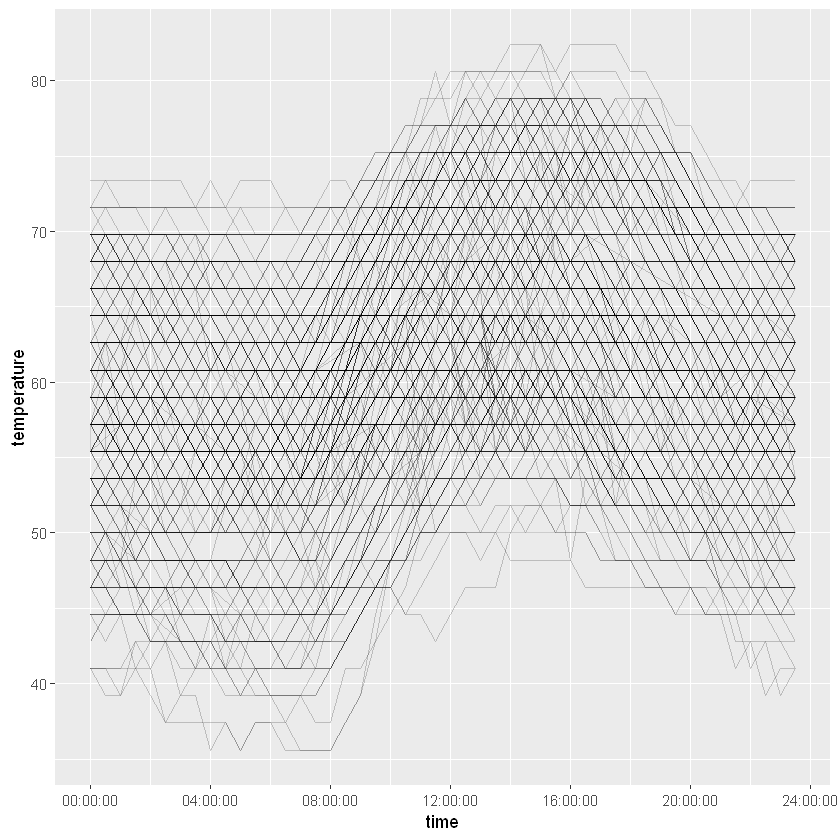

In [9]:
# Examine structure of time column
str(akl_hourly$time)

# Examine head of time column
head(akl_hourly$time)

# A plot using just time
ggplot(akl_hourly, aes(x = time, y = temperature)) +
  geom_line(aes(group = make_date(year, month, mday)), alpha = 0.2)


In [11]:
library(microbenchmark)
library(fasttime)

### Fast parsing with `fasttime`

The fasttime package provides a single function `fastPOSIXct()`, designed to read in datetimes formatted according to ISO 8601. Because it only reads in one format, and doesn't have to guess a format, it is really fast!

You'll see how fast in this exercise by comparing how fast it reads in the dates from the Auckland hourly weather data (over 17,000 dates) to lubridates `ymd_hms()`.

To compare run times you'll use the `microbenchmark()` function from the package of the same name. You pass in as many arguments as you want each being an expression to time.

In [14]:
dates <- akl_hourly$datetime_string

In [16]:
# Examine structure of dates
str(dates)
head(dates)
# Use fastPOSIXct() to parse dates
fastPOSIXct(dates) %>% str()

 chr [1:17454] "2016-01-01T00:00:00" "2016-01-01T00:30:00" ...


[1] "2016-01-01T00:00:00" "2016-01-01T00:30:00" "2016-01-01T01:00:00"
[4] "2016-01-01T01:30:00" "2016-01-01T02:00:00" "2016-01-01T02:30:00"

 POSIXct[1:17454], format: "2016-01-01 00:00:00" "2016-01-01 00:30:00" "2016-01-01 01:00:00" ...


In [18]:
# Compare speed of fastPOSIXct() to ymd_hms()
summary(microbenchmark(
  ymd_hms = ymd_hms(dates),
  fasttime = fastPOSIXct(dates),
  times = 20))

expr,min,lq,mean,median,uq,max,neval,cld
ymd_hms,16.41296,16.611440,17.298847,16.893742,17.188166,21.157037,20,b
fasttime,1.61204,1.673678,1.741808,1.752985,1.787092,1.869687,20,a


 To compare speed, you can compare the average run time in the mean column. You should see fasttime is about 20 times faster than ymd_hms()

### Fast parsing with `lubridate::fast_strptime`

lubridate provides its own fast datetime parser: `fast_strptime()`. Instead of taking an order argument like `parse_date_time()` it takes a format argument and the format must comply with the `strptime()` style.

As you saw in the video that means any character that represents a datetime component must be prefixed with a % and any non-whitespace characters must be explicitly included.

Try parsing dates with `fast_strptime()` and then compare its speed to the other methods you've seen.

In [21]:
# Head of dates
head(dates)

# Parse dates with fast_strptime
fast_strptime(dates, 
    format = "%Y-%m-%dT%H:%M:%S") %>% str()


[1] "2016-01-01T00:00:00" "2016-01-01T00:30:00" "2016-01-01T01:00:00"
[4] "2016-01-01T01:30:00" "2016-01-01T02:00:00" "2016-01-01T02:30:00"

 POSIXlt[1:17454], format: "2016-01-01 00:00:00" "2016-01-01 00:30:00" "2016-01-01 01:00:00" ...


In [22]:
# Comparse speed to ymd_hms() and fasttime
summary(microbenchmark(
  ymd_hms = ymd_hms(dates),
  fasttime = fastPOSIXct(dates),
  fast_strptime = fast_strptime(dates, 
    format = "%Y-%m-%dT%H:%M:%S"),
  times = 20))

expr,min,lq,mean,median,uq,max,neval,cld
ymd_hms,16.670202,16.818955,17.983255,17.164333,18.292925,22.172831,20,b
fasttime,1.607109,1.656009,1.738439,1.708607,1.804556,2.095692,20,a
fast_strptime,1.948994,2.036931,2.119382,2.120965,2.217942,2.261704,20,a


### Outputting pretty dates and times

An easy way to output dates is to use the `stamp()` function in lubridate. `stamp()` takes a string which should be an example of how the date should be formatted, and returns a function that can be used to format dates.

In this exercise you'll practice outputting today() in a nice way.

In [23]:
# Create a stamp based on "Sep 20 2017"
date_stamp <- stamp("Sep 20 2017")

# Print date_stamp
date_stamp

# Call date_stamp on today()
date_stamp(today())

# Create and call a stamp based on "09/20/2017"
stamp("09/20/2017")(today())


Multiple formats matched: "%Om %d %y%H"(1), "%Om %y %d%H"(1), "%Om %d %Y"(1), "%b %d %y%H"(1), "%b %y %d%H"(1), "%b %d %Y"(1), "Sep %H %M%S"(1)
Using: "%b %y %d%H"


function (x, locale = "German_Germany.1252") 
{
    {
        old_lc_time <- Sys.getlocale("LC_TIME")
        if (old_lc_time != locale) {
            on.exit(Sys.setlocale("LC_TIME", old_lc_time))
            Sys.setlocale("LC_TIME", locale)
        }
    }
    format(x, format = "%b %y %d%H")
}
<environment: 0x000000000fea1da8>

[1] "Nov 18 2500"

Multiple formats matched: "%Om/%d/%y%H"(1), "%Om/%y/%d%H"(1), "%Om/%d/%Y"(1), "%m/%d/%y%H"(1), "%m/%y/%d%H"(1), "%m/%d/%Y"(1)
Using: "%Om/%y/%d%H"


[1] "11/18/2500"